In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import ShuffleSplit

In [ ]:
data  = pd.read_csv("city_day.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
#Dataset available for each city in descending order
data.groupby('City').size().sort_values(ascending=False)

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
dtype: int64

In [ ]:
df=data.copy()
# Fill the mssing value wiht Mean value of numeric data.
df['PM2.5'].fillna(df['PM2.5'].mean().round(2),inplace = True )
df['PM10'].fillna(df['PM10'].mean().round(2),inplace = True )
df['NO'].fillna(df['NO'].mean().round(2),inplace = True )
df['NO2'].fillna(df['NO2'].mean().round(2),inplace = True )
df['NOx'].fillna(df['NOx'].mean().round(2),inplace = True )
df['NH3'].fillna(df['NH3'].mean().round(2),inplace = True )
df['CO'].fillna(df['CO'].mean().round(2),inplace = True )
df['SO2'].fillna(df['SO2'].mean().round(2),inplace = True )
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.45,118.13,0.92,18.22,17.15,23.48,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,67.45,118.13,0.97,15.69,16.46,23.48,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,67.45,118.13,17.40,19.30,29.70,23.48,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,67.45,118.13,1.70,18.48,17.97,23.48,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,67.45,118.13,22.10,21.42,37.76,23.48,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df['AQI_Bucket'].unique() # getting the unique values of AOI Bucket.

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [ ]:
# checking the Null values for AQI of 0 - 50  range.
good=df[(df.AQI >0)&(df.AQI <=50)]
good["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of 51 - 100  range.
Satisfactory=df[(df.AQI >50)&(df.AQI <=100)]
Satisfactory["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of 101 - 200  range.
Moderate=df[(df.AQI >100)&(df.AQI <=200)]
Moderate["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of 201 - 300  range.
poor=df[(df.AQI >200)&(df.AQI <=300)]
poor["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of 301 - 400  range.
vpoor=df[(df.AQI >300)&(df.AQI <=400)]
vpoor["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of above 400 range.
sever=df[(df.AQI >400)]
sever["AQI_Bucket"].isnull().sum()

0

In [ ]:
# The Null value belongs to on 100 to 200 range of AQI hence they are replaced by term Mederate.
df["AQI_Bucket"].fillna("Moderate",inplace = True )

In [ ]:
# Adding a columns of Year and a Month and spliting it rom date
df.drop(['Benzene','Toluene','Xylene','Date'],axis='columns',inplace=True)
df

KeyError: ignored

In [ ]:
df.isnull().sum() # Checking the null values.


City             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3            4022
AQI           4681
AQI_Bucket       0
dtype: int64

In [ ]:
data = data.copy()
data = data.dropna(subset=['AQI'])
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
# Arranging city wise PM 2.5 levels mean values
pm2_51=df.groupby("City")["PM2.5"].mean().round()
pm2_51

City
Ahmedabad              68.0
Aizawl                 18.0
Amaravati              40.0
Amritsar               57.0
Bengaluru              38.0
Bhopal                 51.0
Brajrajnagar           65.0
Chandigarh             42.0
Chennai                51.0
Coimbatore             30.0
Delhi                 117.0
Ernakulam              26.0
Gurugram              113.0
Guwahati               64.0
Hyderabad              48.0
Jaipur                 55.0
Jorapokhar             66.0
Kochi                  31.0
Kolkata                65.0
Lucknow               108.0
Mumbai                 55.0
Patna                 114.0
Shillong               38.0
Talcher                63.0
Thiruvananthapuram     30.0
Visakhapatnam          50.0
Name: PM2.5, dtype: float64

In [ ]:
# Selecting the top 10 cities having high average PM 2.5 level.
pm2_51.sort_values(ascending=False).head(10)

City
Delhi           117.0
Patna           114.0
Gurugram        113.0
Lucknow         108.0
Ahmedabad        68.0
Jorapokhar       66.0
Kolkata          65.0
Brajrajnagar     65.0
Guwahati         64.0
Talcher          63.0
Name: PM2.5, dtype: float64

In [ ]:
#Determining the percentage of missing values of columns with respect to cities.

#missing values of each column with respective to that city
group_city  = data.groupby("City")

#Empty list to store dataframe for each city
dfs = [ ]

for city, subset in group_city:
    missing_values_count = subset.isnull().sum()
    total_rows = subset.shape[0]
    missing_values_percentage = (missing_values_count / total_rows) * 100

    #Dataframe for current city
    city_missing_values_df = pd.DataFrame({
        'City': city,
        'Column': missing_values_count.index,
        'Missing Values': missing_values_count.values,
        'Missing Values Percentage': missing_values_percentage.values
    })


    dfs.append(city_missing_values_df)

missing_values_df = pd.concat(dfs, ignore_index=True)

print('Dataframe of missing values ')
missing_values_df

Dataframe of missing values 


,City,Column,Missing Values,Missing Values Percentage
0,Ahmedabad,City,0,0.000000
1,Ahmedabad,Date,0,0.000000
2,Ahmedabad,PM2.5,2,0.149925
3,Ahmedabad,PM10,937,70.239880
4,Ahmedabad,NO,7,0.524738
...,...,...,...,...
411,Visakhapatnam,Benzene,5,0.426985
412,Visakhapatnam,Toluene,5,0.426985
413,Visakhapatnam,Xylene,5,0.426985
414,Visakhapatnam,AQI,0,0.000000


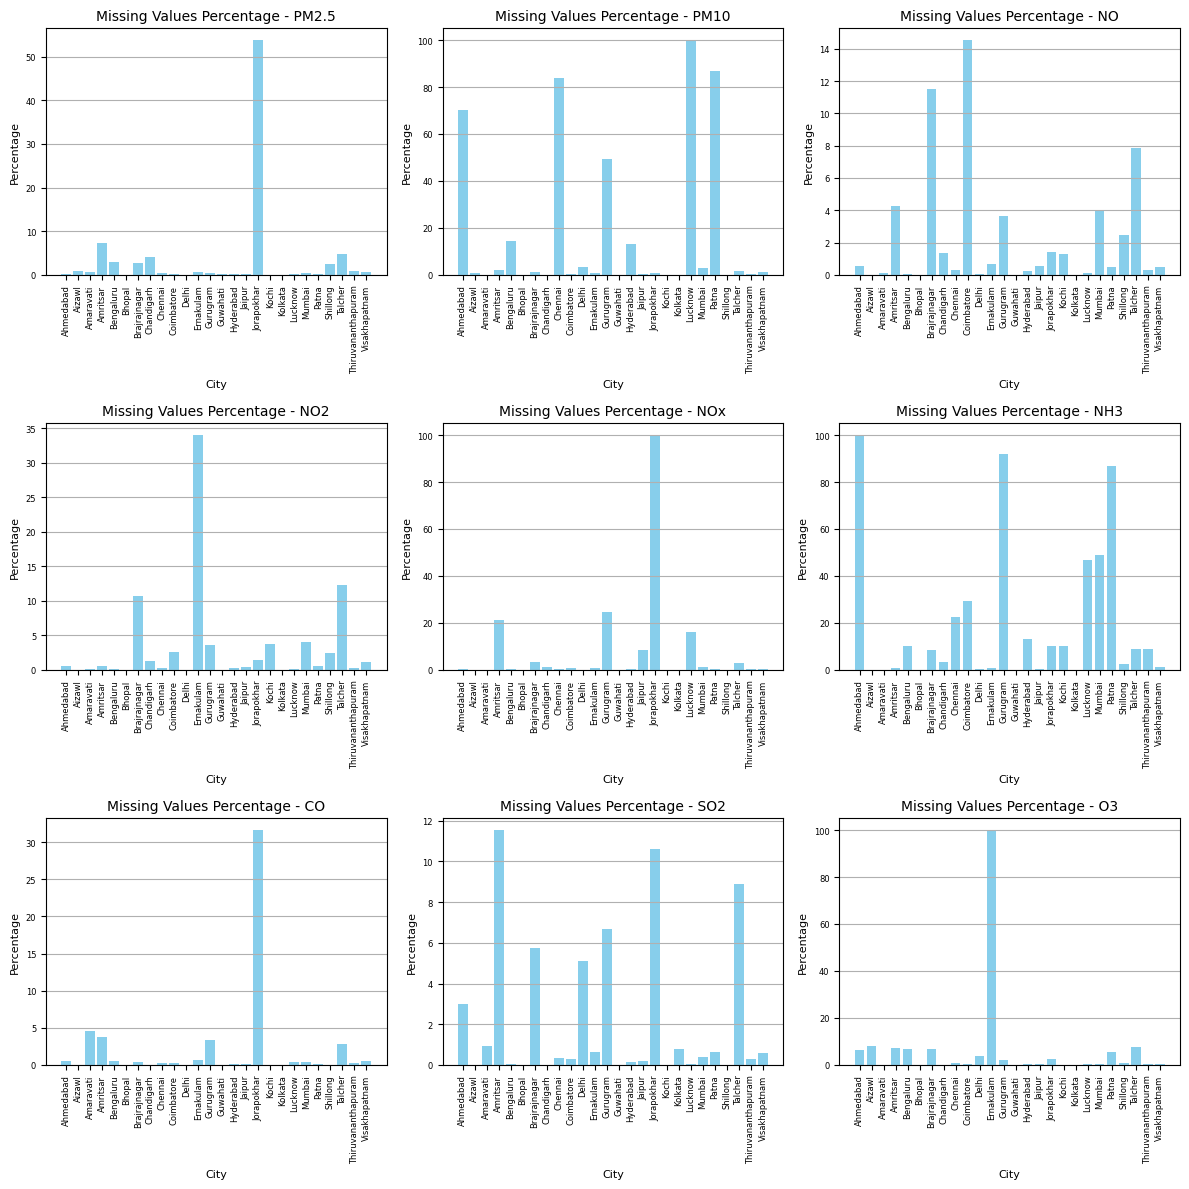

In [ ]:
#bar plot to analyse the percentage of missing values with respect to each city


import matplotlib.pyplot as plt

columns = data.columns[2:11]
num_columns = len(columns)
num_rows = (num_columns + 2) // 3  # Number of rows in the grid layout
num_cols = 3  # Number of columns in the grid layout

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    city_names = missing_values_df.loc[missing_values_df['Column'] == column, 'City']
    missing_percentage = missing_values_df.loc[missing_values_df['Column'] == column, 'Missing Values Percentage']
    ax.bar(city_names, missing_percentage, color='skyblue')
    ax.set_title(f"Missing Values Percentage - {column}", fontsize=10)
    ax.set_xlabel("City", fontsize=8)
    ax.set_ylabel("Percentage", fontsize=8)
    ax.set_xticks(range(len(city_names)))
    ax.set_xticklabels(city_names, rotation=90, fontsize=6)
    ax.grid(axis='y')
    ax.tick_params(axis='both', labelsize=6)

# Remove empty subplots
if num_columns % num_cols != 0:
    for i in range(num_columns % num_cols, num_cols):
        fig.delaxes(axs[-1, i])

plt.tight_layout()
plt.show()


<Axes: title={'center': 'PM 2.5 Levels in different cities'}, xlabel='Level', ylabel='City'>

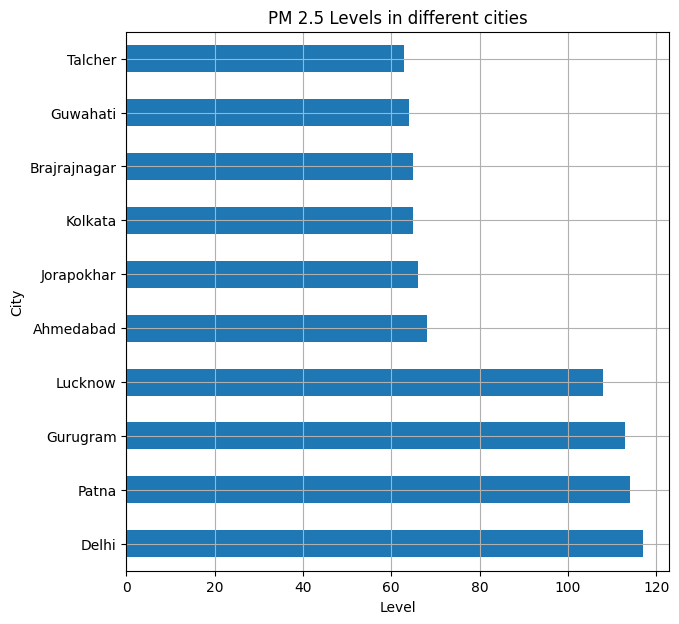

In [ ]:
# Plotting the horizontal bar plot for cities against PM 2.5 level value.
pm2_51.sort_values(ascending=False).head(10) .plot(figsize=(7,7),kind="barh",title="PM 2.5 Levels in different cities", xlabel="Level", ylabel="City",grid=True)

In [ ]:
# g = df.groupby(['City']).NO.agg([min, max])
# # Plotting the horizontal plot of  cities with minimum and maximum level Nitrogen Monoxide,
# g.plot(figsize=(7,7),kind="barh",title="PM 2.5 count per day in different cities", xlabel="Count of days", ylabel="City",grid=True)

In [ ]:
# #  Maximum and minimum NO2 (Nitrogen dioxide) of each city
# # NO2 is also knows an most dangerous pollutant and  is generated from the combustion of fuel engines and industry.
# # It can damage the human heart and lungs and it reduces atmospheric visibility at high concentrations.
# h = df.groupby(['City']).NO2.agg([min, max])
# # Finding the top 10 cities with maximum level of NO2.
# h1=h.sort_values(['max'],ascending=False)
# h1.head(10)
# # Plotting the horizontal plot of  cities with minimum and maximum level Nitrogen dioxide,

# h.plot(figsize=(7,7),kind="barh",title="PM 2.5 count per day in different cities", xlabel="Count of days", ylabel="City",grid=True)

<ipython-input-29-eb6921ad36f9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aqi=df.groupby("City").mean()["AQI"].round().sort_values(ascending=False)


City
Ahmedabad             452.0
Delhi                 259.0
Patna                 241.0
Gurugram              225.0
Lucknow               218.0
Talcher               173.0
Jorapokhar            159.0
Brajrajnagar          150.0
Kolkata               141.0
Guwahati              140.0
Jaipur                134.0
Bhopal                133.0
Amritsar              120.0
Visakhapatnam         117.0
Chennai               115.0
Hyderabad             109.0
Mumbai                105.0
Kochi                 104.0
Chandigarh             96.0
Amaravati              95.0
Bengaluru              94.0
Ernakulam              92.0
Thiruvananthapuram     76.0
Coimbatore             73.0
Shillong               54.0
Aizawl                 35.0
Name: AQI, dtype: float64


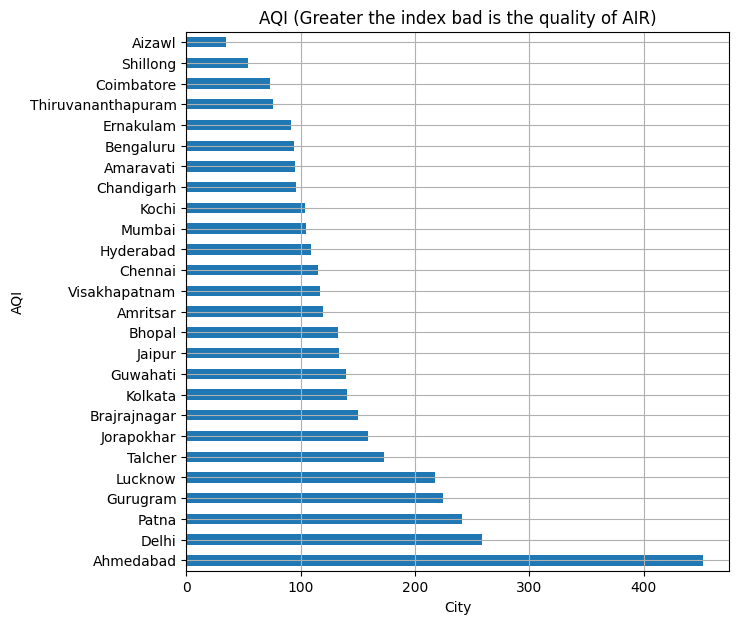

In [ ]:
# obtaining the data of city wise mean AQI index and arranging it in descending order.
aqi=df.groupby("City").mean()["AQI"].round().sort_values(ascending=False)
# Plotting the horizontal plot of  top 10 cities against high AQI value,

aqi.plot(figsize=(7,7),kind="barh",title="AQI (Greater the index bad is the quality of AIR)", xlabel="City", ylabel="AQI",grid=True)
print(aqi)

In [ ]:
# Getting the data of Cities with AQI mean values.
AQIB=df.groupby("City")["AQI"].mean()

In [ ]:
# Resetting the index values of dataset.
AQIB=AQIB.reset_index()
AQIB

,City,AQI
0,Ahmedabad,452.122939
1,Aizawl,34.765766
2,Amaravati,95.299643
3,Amritsar,119.920959
4,Bengaluru,94.318325
5,Bhopal,132.827338
6,Brajrajnagar,150.280505
7,Chandigarh,96.498328
8,Chennai,114.502654
9,Coimbatore,73.023256


## AQI Category (Range)
###### Good (0-50)
###### Satisfactory (51-100)
###### Moderate (101-200)
###### Poor (201-300)
###### Very poor (301-400)
###### Severe (401-500)

In [ ]:
# Programming a function which will compare the values of AQI and gives its respective remark in next columns.
def categorise(row):
    if row['AQI'] > 0 and row['AQI'] <= 50:
        return 'Good'
    elif row['AQI'] > 50 and row['AQI'] <= 100:
        return 'Satisfactory'
    elif row['AQI'] > 100 and row['AQI'] <= 200:
        return 'Moderate'
    elif row['AQI'] > 200 and row['AQI'] <= 300:
        return 'Poor'
    elif row['AQI'] > 300 and row['AQI'] <= 400:
        return 'Very Poor'
    return 'Sever'

In [ ]:
# Applying the values on AQIB Bucket.
AQIB['AQI_Bucket'] = AQIB.apply(lambda row: categorise(row), axis=1)

In [ ]:
# Changing the index to City.
AQIB.set_index(AQIB["City"],inplace=True)

In [ ]:
# Dropping the extra City Column.
AQIB.drop("City",axis=1)

,AQI,AQI_Bucket
City,,
Ahmedabad,452.122939,Sever
Aizawl,34.765766,Good
Amaravati,95.299643,Satisfactory
Amritsar,119.920959,Moderate
Bengaluru,94.318325,Satisfactory
Bhopal,132.827338,Moderate
Brajrajnagar,150.280505,Moderate
Chandigarh,96.498328,Satisfactory
Chennai,114.502654,Moderate


In [ ]:
# Getting the value counts of AQI Bucket.
AQIB1=AQIB["AQI_Bucket"].value_counts()
AQIB1

Moderate        13
Satisfactory     7
Poor             4
Sever            1
Good             1
Name: AQI_Bucket, dtype: int64

Moderate        13
Satisfactory     7
Poor             4
Sever            1
Good             1
Name: AQI_Bucket, dtype: int64


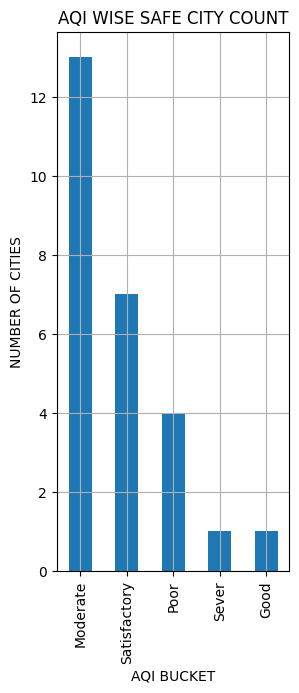

In [ ]:
# Plotting the bar plot of  AQI Bucket with repeating count from data.,
AQIB1.plot(figsize=(3,7),kind="bar",title="AQI WISE SAFE CITY COUNT", xlabel="AQI BUCKET", ylabel="NUMBER OF CITIES",grid=True)
print(AQIB1)


Exploratory Data Analysis
Missing value analysis and Treatment

In [ ]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3) and find how these contents correlated with AQI (air quality index)

In [ ]:
df = df1.copy()
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          29531 non-null  object 
 1   AQI                           29531 non-null  float64
 2   AQI_Bucket                    29531 non-null  object 
 3   Vehicular Pollution content   29531 non-null  float64
 4   Industrial Pollution content  29531 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
#loading
import pandas as pd
import numpy as np
# import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install chart_studio
# import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# import cufflinks
# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor


## Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))
df1.info()

categorical_attributes ['City', 'AQI_Bucket']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  int64  
 1   PM2.5       29531 non-null  float64
 2   PM10        29531 non-null  float64
 3   NO          29531 non-null  float64
 4   NO2         29531 non-null  float64
 5   NOx         29531 non-null  float64
 6   NH3         29531 non-null  float64
 7   CO          29531 non-null  float64
 8   SO2         29531 non-null  float64
 9   O3          29531 non-null  float64
 10  AQI         29531 non-null  float64
 11  AQI_Bucket  29531 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.7 MB


In [ ]:
cor = df1.corr()
cor.style.background_gradient(cmap='coolwarm')

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
City,1.000000,0.072811,-0.013009,0.056491,-0.069854,0.025792,-0.178003,-0.261160,-0.094846,0.001530,-0.121778,-0.053770
PM2.5,0.072811,1.000000,0.558084,0.426376,0.344341,0.380725,0.189211,0.086663,0.119512,0.156116,0.623163,0.376321
PM10,-0.013009,0.558084,1.000000,0.431006,0.359166,0.415132,0.223027,0.047521,0.176189,0.204825,0.481032,0.208993
NO,0.056491,0.426376,0.431006,1.000000,0.462401,0.746222,0.156391,0.211643,0.166190,0.013669,0.427303,0.229363
NO2,-0.069854,0.344341,0.359166,0.462401,1.000000,0.574188,0.165975,0.353235,0.382758,0.285087,0.523756,0.234885
NOx,0.025792,0.380725,0.415132,0.746222,0.574188,1.000000,0.128046,0.225096,0.208355,0.083256,0.434099,0.198123
NH3,-0.178003,0.189211,0.223027,0.156391,0.165975,0.128046,1.000000,0.020009,-0.021022,0.078945,0.140208,0.081169
CO,-0.261160,0.086663,0.047521,0.211643,0.353235,0.225096,0.020009,1.000000,0.472587,0.041599,0.648076,0.207240
SO2,-0.094846,0.119512,0.176189,0.166190,0.382758,0.208355,-0.021022,0.472587,1.000000,0.155834,0.445520,0.143484
O3,0.001530,0.156116,0.204825,0.013669,0.285087,0.083256,0.078945,0.041599,0.155834,1.000000,0.199100,0.030637


In [ ]:
from sklearn.model_selection import train_test_split
y = df1["AQI_Bucket"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 9393, 3: 5799, 2: 1940, 5: 1634, 4: 957, 0: 948})


### Data Imbalance:
Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({1: 9393, 5: 9393, 3: 9393, 0: 9393, 2: 9393, 4: 9393})


In [ ]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2)
cross_val_score(LinearRegression(),x_train,y_train,cv=cv)

array([0.42395648, 0.43710772, 0.42828661, 0.4307376 , 0.42384284])

In [ ]:
def find_best_model_gridsearchcv(x, y):
    algos = {
        'LinearRegression': {
            'model': LinearRegression(),
            'parameter': {
                # 'normalize': ['True', 'False']
            }
        },
        'LogisticRegression': {
            'model': LogisticRegression(),
            'parameter': {
            }
        },
        'Lasso': {
            'model': Lasso(),
            'parameter': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'DecisionTreeRegressor': {
            'model': DecisionTreeRegressor(),
            'parameter': {
                'criterion': ['squared_error', 'friedman_mse', 'poisson'],
                'splitter': ['best', 'random']
            }
        },

        'KNN': {
            'model': KNeighborsRegressor(),
            'parameter': {}
        }
    }

    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=False)

    for model_name, parameter in algos.items():
        clf = GridSearchCV(parameter['model'], parameter['parameter'], cv=cv, return_train_score=False)
        clf.fit(x, y)
        score.append({
            'model': model_name,
            'score': clf.best_score_,
            'parameter': clf.best_params_
        })

    return pd.DataFrame(score, columns=['model', 'score', 'parameter'])


In [ ]:
find_best_model_gridsearchcv(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

KeyboardInterrupt: ignored